In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:

column = 'Clump Thickness'

In [15]:

breast_cancer = pd.read_csv('breast_cancer.csv')
breast_cancer

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,1,1,1,1,2,1,3,1,1,0
1,1002945,3,4,4,5,7,10,3,2,1,0
2,1015425,5,1,1,1,2,2,3,1,1,0
3,1016277,10,8,8,1,3,4,3,7,1,0
4,1017023,1,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,4,1,1,1,3,2,1,1,1,0
679,841769,5,1,1,1,2,1,1,1,1,0
680,888820,1,10,10,3,7,3,8,10,2,1
681,897471,1,8,6,4,3,4,10,6,1,1


(array([0.22612657, 0.08134049, 0.16918822, 0.12851798, 0.20823166,
        0.05368472, 0.03741663, 0.07157963, 0.02277534, 0.11224988]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

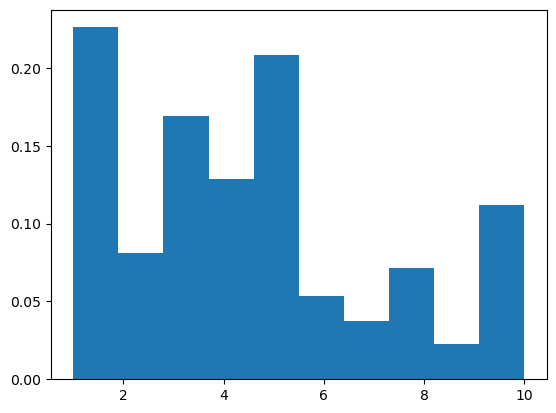

In [16]:

plt.hist(breast_cancer[column], density=True)

In [17]:

healthy = breast_cancer[breast_cancer['Class'] == 0]
not_healthy = breast_cancer[breast_cancer['Class'] == 1]

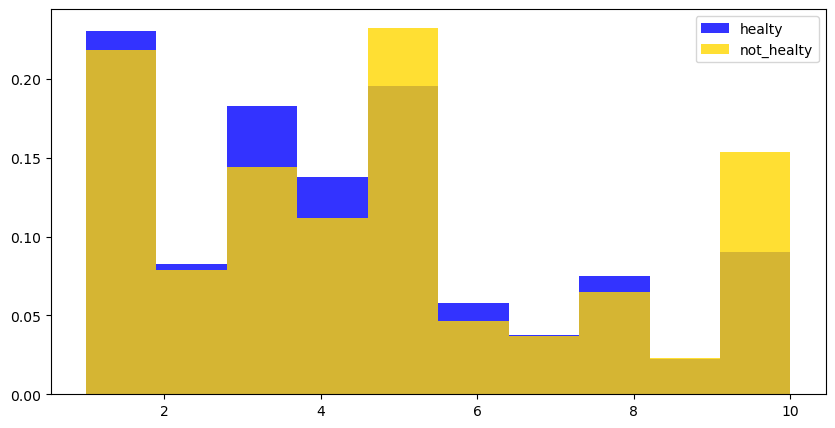

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(healthy[column],
        density=True,
        label='healty',
        color='blue', 
        alpha=0.8)
ax.hist(not_healthy[column],
        density=True, 
        label='not_healty', 
        color='gold', 
        alpha=0.8)
ax.legend()


**Null Hypothesis:** The values of the column are independent of 'Class' (individual's health) of the table 'breast_cancer'.  
**Alternative Hypothesis:** The values of the column are dependent of 'Class' (individual's health) of the table 'breast_cancer'.


a table 'breast_cancer_group' which shows the average values of the column for each 'Class' group.

In [19]:

breast_cancer_group=breast_cancer.groupby("Class")[column].mean().reset_index()
breast_cancer_group

,Class,Clump Thickness
0,0,4.304054
1,1,4.698745



Create a variable 'observed_distance' whose value is the absolute difference of averages found

In [20]:

means=breast_cancer_group[column]
observed_distance=abs(means.iloc[0]-means.iloc[1])
observed_distance


0.39469071582042226

Creating a table 'breast_cancer_shuffled' whose values are initially copied from the table 'breast_cancer'. Then, adding to the table 'breast_cancer_shuffled' a new column 'Shuffled Class' whose values are the **randomly shuffled** values of the column 'Class'.

In [21]:

breast_cancer_shuffled=breast_cancer.copy()
breast_cancer_shuffled1=breast_cancer_shuffled['Class'].sample(len(breast_cancer_shuffled), replace = False)
breast_cancer_shuffled['Shuffled Class']=np.array(breast_cancer_shuffled1)
breast_cancer_shuffled


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Shuffled Class
0,1000025,1,1,1,1,2,1,3,1,1,0,0
1,1002945,3,4,4,5,7,10,3,2,1,0,0
2,1015425,5,1,1,1,2,2,3,1,1,0,1
3,1016277,10,8,8,1,3,4,3,7,1,0,1
4,1017023,1,1,1,3,2,1,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
678,776715,4,1,1,1,3,2,1,1,1,0,1
679,841769,5,1,1,1,2,1,1,1,1,0,0
680,888820,1,10,10,3,7,3,8,10,2,1,1
681,897471,1,8,6,4,3,4,10,6,1,1,1


Creating a variable 'distance' whose value is the absolute difference of average values of the column for each 'Shuffled Class' group.

In [22]:

breast_cancer_shuffled_grouped=breast_cancer_shuffled.groupby('Shuffled Class')[column].mean().reset_index()
means1=breast_cancer_shuffled_grouped[column]
distance=abs(means1.iloc[0]-means1.iloc[1])
distance


0.036544913113950805

In [23]:

simulation_number = 10000

In [24]:


distances = np.array([])
for i in np.arange(simulation_number):
    breast_cancer_shuffled=breast_cancer.copy()
    breast_cancer_shuffled1=breast_cancer_shuffled['Class'].sample(len(breast_cancer_shuffled), replace = False)
    breast_cancer_shuffled['Shuffled Class']=np.array(breast_cancer_shuffled1)
    breast_cancer_shuffled_grouped=breast_cancer_shuffled.groupby('Shuffled Class')[column].mean().reset_index()
    means1=breast_cancer_shuffled_grouped[column]
    observed_distance2=abs(means1.iloc[0]-means1.iloc[1])
    distance = observed_distance2
    distances = np.append(distances, distance)


Finding the P-value of A/B testing conducted.  


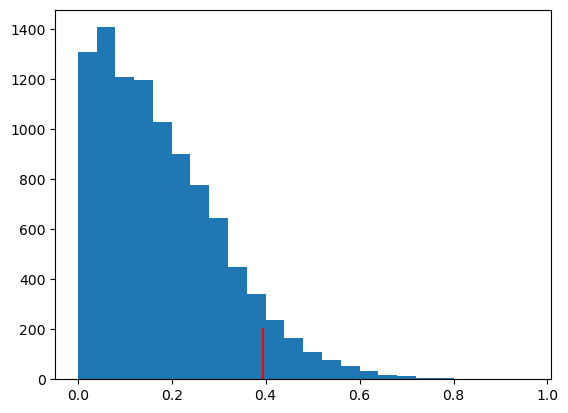

In [25]:

plt.hist(distances, bins=np.arange(0, 1, 0.04))
plt.plot([observed_distance, observed_distance], [0, 200], color="red")

In [26]:


p_value=np.count_nonzero(distances >= observed_distance) / simulation_number
p_value


0.0777

If p-value is less than the significance level,I would reject the Null Hypothesis